# HỆ THỐNG A.I HỖ TRỢ CHỈ ĐỊNH VÀ PHÁT HIỆN CHỈ ĐỊNH PHÁT HIỆN BẤT THƯỜNG CHO VNVC

## 1. Ý tưởng:

### 1.1.Mục tiêu

Dựa trên dữ liệu chỉ định tiêm đã có của VNVC, sau đó sử dụng máy học để tạo ra một hệ thống hỗ trợ nhận chỉ định vaccine của cho bác sĩ

## 2. THỰC HIỆN

### 2.1. THU THẬP DATA

Để tránh các dữ liệu rác và kém chất lượng, chỉ thu thập dữ liệu thực tiêm của khách hàng, từ 4 trung tâm lớn nhất đại diện cho các miền trên cả nước của VNVC (HVT, Đà Nẵng, TC, công viên thanh lễ Bình Dương). 

Từ dữ liệu thu thập, cho thấy bác sĩ đang làm việc với 61 loại vaccine. Nếu cho máy học một cách truyền thống sẽ phải đính kèm với độ tuổi và giới tính tạo nên 63 đầu mục dữ liệu. Bản chất của máy học là xác suất thống kê, nên máy sẽ tạo ra hơn 800 triệu trường hợp giả định từ tập trên để học, để tránh lãng phí tài nguyên máy khi huấn luyện ta có thể giới hạn luật kết hợp dựa trên các hiểu biết về nghiệp vụ như sau: <br> 1. Tương tác vaccine hiện tại chỉ có trường hợp đi theo cặp, nên chiều dài của một trường hợp nên giới hạn tối đa và tối thiểu là 2 vaccines. <br> 2. Một trường hợp huấn luyện bắt buộc phải đi kèm khoảng tuổi và giới tính của khách hàng.<br> 3. Ngày tuổi của khách hàng tại thời điểm tiêm là một đầu mục rất hữu ích cho kết quả đầu ra, quyết định được tiêm vaccine nào, tuy nhiên việc tính chính xác đến hàng ngày sẽ gây phân mảnh dữ liệu tạo nên các tập con rất nhỏ, ảnh hưởng đến mức độ tin cậy của thuật toán, đồng thời cũng tăng số lượng các trường hợp giả định, cho nên để đơn giản, bắt buộc phải chia tuổi theo các khoảng theo nghiệp vụ: Trẻ sơ sinh, trẻ dưới 6 tuổi, trẻ em dưới 18 tuổi, người lớn <br>

In [1]:
#pip install pandas
#pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt


Đọc file Rules

In [3]:
path='C:\Khoa\Git\Association-Rule-Mining\Rules.json'
df=pd.read_json(path)
df.head(5)

,Antecedent,Consequent,Support,Confidence,Count,Cluster
0,"[0, U6, 1000014]",[40],0.001342,0.012067,1183,0
1,"[0, U6, 40]",[1000014],0.001342,0.011451,1183,0
2,"[0, U18, 1000014]",[40],0.014193,0.127642,12513,0
3,"[0, U18, 40]",[1000014],0.014193,0.121120,12513,0
4,"[1, U6, 1000014]",[40],0.001537,0.013822,1355,0


In [4]:
df.info

<bound method DataFrame.info of              Antecedent Consequent   Support  Confidence  Count  Cluster
0      [0, U6, 1000014]       [40]  0.001342    0.012067   1183        0
1           [0, U6, 40]  [1000014]  0.001342    0.011451   1183        0
2     [0, U18, 1000014]       [40]  0.014193    0.127642  12513        0
3          [0, U18, 40]  [1000014]  0.014193    0.121120  12513        0
4      [1, U6, 1000014]       [40]  0.001537    0.013822   1355        0
...                 ...        ...       ...         ...    ...      ...
2807         [1, U6, 2]  [1000011]  0.000096    0.042394     85        0
2808         [0, U6, 4]      [QUI]  0.000018    0.013008     16        0
2809       [0, U6, QUI]        [4]  0.000018    0.018801     16        0
2810         [1, U6, 4]      [QUI]  0.000017    0.012195     15        0
2811       [1, U6, QUI]        [4]  0.000017    0.017626     15        0

[2812 rows x 6 columns]>

In [5]:
df['Name']=' '.join(map(str,df['Antecedent']))+' '.join(map(str,df['Consequent']))
df['Support']=df['Support']*100
df['Confidence']=df['Confidence']*200
df.head(5)

,Antecedent,Consequent,Support,Confidence,Count,Cluster,Name
0,"[0, U6, 1000014]",[40],0.134182,2.413498,1183,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
1,"[0, U6, 40]",[1000014],0.134182,2.290173,1183,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
2,"[0, U18, 1000014]",[40],1.419287,25.528398,12513,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
3,"[0, U18, 40]",[1000014],1.419287,24.223946,12513,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
4,"[1, U6, 1000014]",[40],0.153691,2.764403,1355,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."


In [6]:
df.sort_values(by=["Confidence"],ascending=False)

,Antecedent,Consequent,Support,Confidence,Count,Cluster,Name
1287,"[0, U18, 18]",[36],0.243523,124.970900,2147,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
1343,"[1, U6, 12]",[9],1.379134,77.735508,12159,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
1423,"[1, U6, 12]",[11],0.340502,76.905340,3002,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
1419,"[0, U6, 12]",[11],0.322581,72.857690,2844,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
1387,"[1, U6, 12]",[10],0.252938,70.591960,2230,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
...,...,...,...,...,...,...,...
904,"[1, U18, 100003]",[1000012],0.001815,0.018428,16,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
920,"[0, U6, 4]",[1000012],0.001815,0.018428,16,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
908,"[1, U6, 2]",[1000012],0.001815,0.018428,16,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
922,"[0, U18, 4]",[1000012],0.001588,0.016125,14,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."


### 2.2. MỨC ĐỘ PHÂN BỐ VÀ THÓI QUEN SỬ DỤNG VACCINES CỦA BÁC SĨ

Cơ sở tự tin (Confidence) dựa trên tần suất xuất hiện chung của một set vaccine. Được hiểu như, nếu vaccine A xuất hiện trong 10 chỉ định, trong đó có 5 chỉ định xuất hiện cùng vaccine B thì có nghĩa B thường đi với A trong 50% chỉ định, và lúc này khi chỉ định B theo A là 50%. Tuy nhiên số nảy khá là cảm tính, vì nếu xét theo thực tế nếu 50% này là hàng nghìn ca thì độ tự tin khi chỉ định B kèm A với chúng ta đó cũng tương đương là 100% rồi.

Bd01. Biểu đồ quan sát mức độ phân bố confidence

<Axes: xlabel='Confidence', ylabel='Count'>

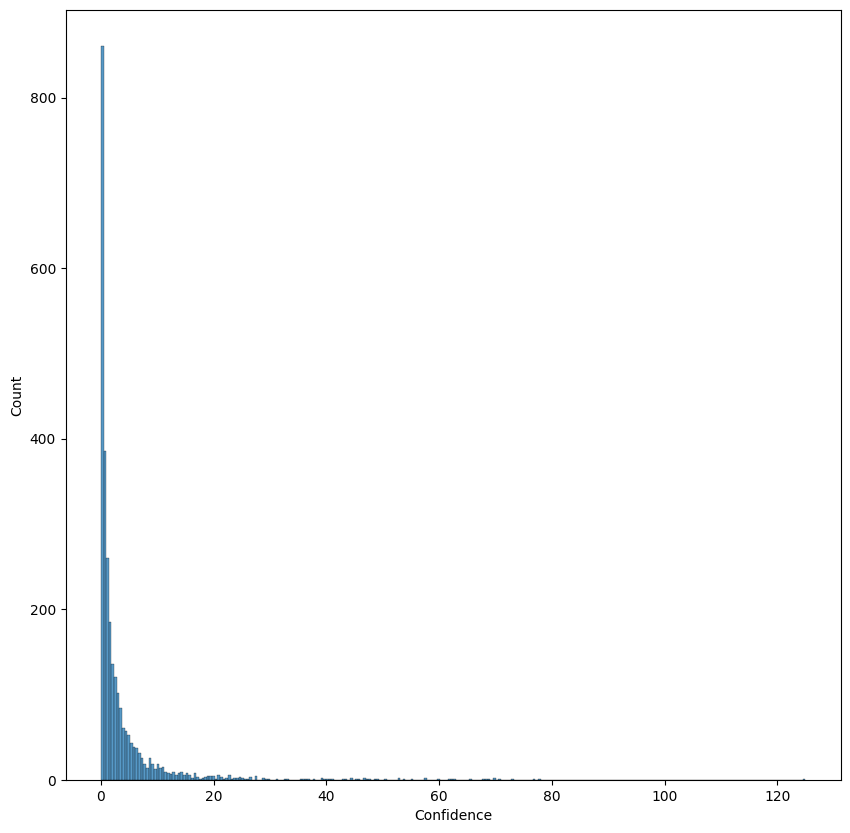

In [7]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x=df['Confidence'])


Qua biểu đồ phân bố mức độ confidence của A.I tập trung chủ yếu ở mức dưới 10%, điều này thể hiện mức độ chắc chắn khi một cặp vaccines kết hợp với nhau là tương đối là thấp. Hay nói chinh xác hơn trong 2811 quy luật vaccine mà A.I phát hiện ra thì chỉ có vài quy luật có độ chính xác cao. Điều này có thể đến từ việc số lượng luật lệ, hay phân bố chỉ định là rất đa dạng, nếu so với một tập chỉ 67 loại vaccine, tuy nhiên theo thói quen các bác sĩ chỉ tập trung chỉ định theo những cặp vaccines được định sẵn theo thói quen. 

Biểu đồ Thể hiện số lần xuất hiện của mỗi loại luật

In [8]:
sorted_df=df.sort_values(by='Count',ascending=False).head(200)
sorted_df.head(5)

,Antecedent,Consequent,Support,Confidence,Count,Cluster,Name
1334,"[1, U6, 8]",[12],2.256477,45.214150,19894,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
1335,"[1, U6, 12]",[8],2.256477,59.969550,19894,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
1331,"[0, U6, 12]",[8],2.023275,53.771836,17838,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
1330,"[0, U6, 8]",[12],2.023275,40.541368,17838,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
843,"[1, U6, 1000012]",[16],1.660542,44.192222,14640,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."


In [9]:
dfsumten=sum(sorted_df['Count'])
dfsum=sum(df['Count'])
df_percent = pd.DataFrame(columns=['Title', 'Value'])
new_row={'Title':'Top 200','Value':(dfsumten/dfsum)*100}
df_percent.loc[len(df_percent)]=new_row
new_row={'Title':'The rest','Value':((dfsum-dfsumten)/dfsum)*100}
df_percent.loc[len(df_percent)]=new_row
df_percent

,Title,Value
0,Top 200,55.79475
1,The rest,44.20525


Bd02. Biểu đồ thể hiện tần suất sử dụng của các luật chỉ định

<Axes: xlabel='Title', ylabel='Value'>

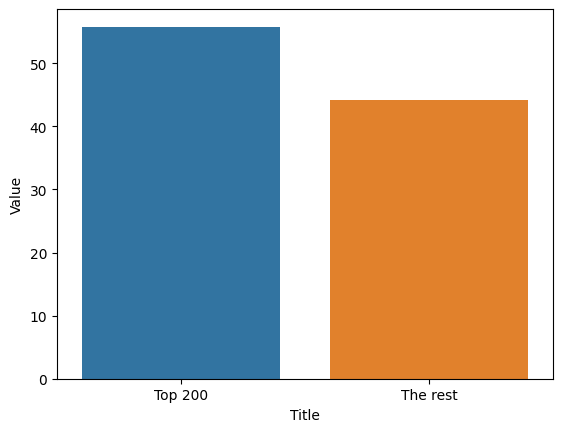

In [10]:
sns.barplot(x='Title',y='Value',data=df_percent)

Biểu đồ trên cho thấy sự chênh lệch trong việc sử dụng các cặp vaccine. Cụ thể hơn, mặc dù có tới 2811 các cặp và set chỉ định nhưng các bác sĩ của VNVC thường chỉ sử dụng khoảng 7,66% trong số đó (chiếm tới hơn 55%). Qua đó, có thể thấy được mặc dù đa phần các chỉ định của bác sĩ là theo các set quen thuộc tuy nhiên cũng có gần một nửa là các kết hợp vaccine ngẫu nhiên, với tần suất xuất hiện không cao, đây cũng có thể là các cặp vaccine khiến các bác sĩ mới cảm thấy ngần ngại khi chỉ định, hoặc vì một lí do nào đó mà bị hạn chế chỉ định. <br> Đây cũng là cơ sở để tạo ra hệ thống trí tuệ nhân tạo, để phát hiện ra các trường hợp chỉ định "bất thường" hay được hiểu là "xuất hiện rất thấp, hoặc chưa từng xuất hiện" dù theo các danh mục được cài đặt thì không hề cấm, để nhắc nhở các bác sĩ, cũng như kêu gọi hỗ trợ kịp thời thông qua việc hội chẩn từ các bác sĩ khác. Giúp nâng cao chất lượng phục vụ, và mang lại sự an toàn hơn cho khách hàng tiêm chủng của VNVC

### 2.3. ĐƠN GIẢN HÓA CÁC CHỈ SỐ HỖ TRỢ

Bd3. Biểu diễn phân bố dữ liệu

<Axes: xlabel='Support', ylabel='Confidence'>

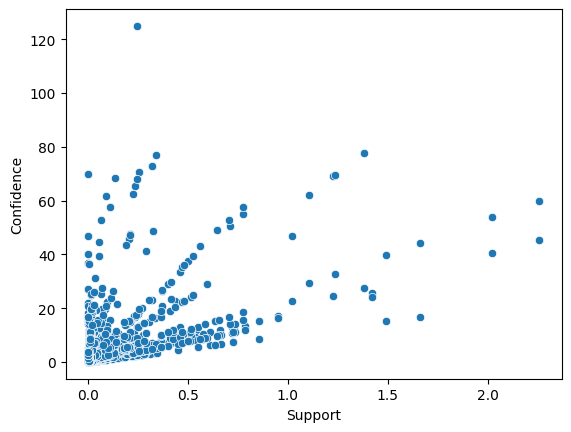

In [11]:
sns.scatterplot(x=df['Support'],y=df['Confidence'],data=df)

In [12]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.loc[:,['Support','Confidence']])
    wcss.append(kmeans.inertia_)



Text(0, 0.5, 'WCSS')

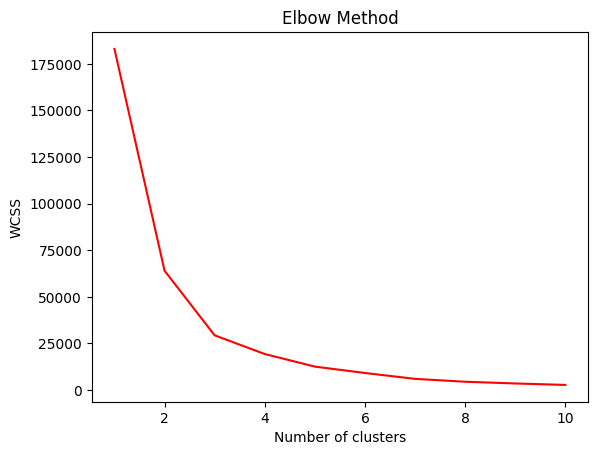

In [13]:
sns.lineplot(x=range(1,11),y=wcss,markers='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [14]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df.loc[:,['Support','Confidence']])

df['cluster'] = pred_y

df.head(5)

,Antecedent,Consequent,Support,Confidence,Count,Cluster,Name,cluster
0,"[0, U6, 1000014]",[40],0.134182,2.413498,1183,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',...",0
1,"[0, U6, 40]",[1000014],0.134182,2.290173,1183,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',...",0
2,"[0, U18, 1000014]",[40],1.419287,25.528398,12513,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',...",3
3,"[0, U18, 40]",[1000014],1.419287,24.223946,12513,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',...",3
4,"[1, U6, 1000014]",[40],0.153691,2.764403,1355,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',...",0


<Axes: xlabel='Support', ylabel='Confidence'>

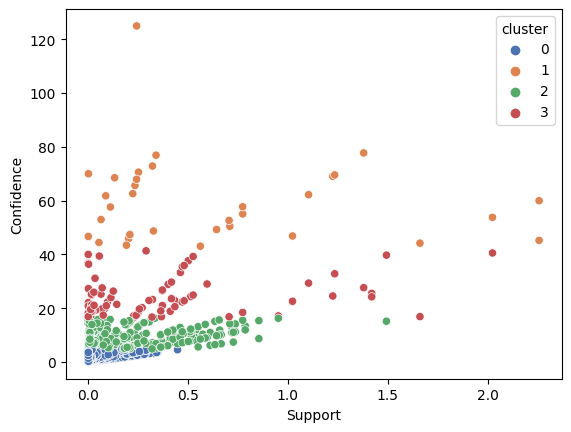

In [15]:
sns.scatterplot(data=df, x='Support', y='Confidence', hue='cluster', palette='deep')

Để dễ dàng hơn trong việc đưa ra các chỉ báo hỗ trợ cho bác sĩ khi chỉ định. A.I sẽ đưa ra các mức cảnh báo dựa trên tổng số lượng chỉ định cặp vaccine và tỷ lệ xuất hiện theo cặp của các loại vaccine. Như trên, thuật toán máy học đã tự động chia dữ liệu ra thành 4 cụm dữ liệu, trong đó màu cam là nguy hiểm nhất và xanh lá cây là an toàn nhất (với support và confidence cao nhất so với tập dữ liệu)

Biểu đồ so sánh tỷ lệ phân loại

<Axes: xlabel='cluster', ylabel='count'>

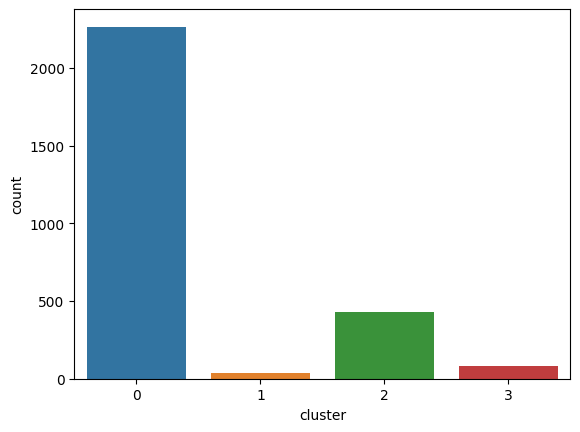

In [16]:
sns.countplot(data=df, x='cluster')

Tỷ lệ phân bố phù hợp với phân tích đã nêu từ đầu, số lượng các cặp dữ liệu an toàn chiếm rất ít (2,3,4) còn lại đa phần là không an toàn (0,1). Từ đó ta có thể đưa ra các chỉ báo như sau

Danh sách màu sắc phân loại cảnh báo: <br>    1. Số lượng chỉ định lớn, tỷ lệ xuất hiện cùng nhau cao: Màu Xanh lá cây <br> 2. Số lượng chỉ định lớn, tỷ lệ xuất hiện cùng nhau thấp: Màu Vàng <br>   3. Số lượng chỉ định nhỏ tỷ lệ xuất hiện cùng nhau cao: Màu Cam <br>   4. Số lượng chỉ định nhỏ, tỷ lệ xuất hiện cùng nhau nhỏ: Màu Đỏ <br> 5. Chưa từng xuất hiện: Màu Đen

Lưu lại kết quả:

In [17]:
path2='C:\Khoa\Git\Association-Rule-Mining\RulesClusterIncluded.json'
df.drop(df.columns[-1], axis=1).to_json(path2, orient='records')

In [18]:
df.head(5)

,Antecedent,Consequent,Support,Confidence,Count,Cluster,Name,cluster
0,"[0, U6, 1000014]",[40],0.134182,2.413498,1183,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',...",0
1,"[0, U6, 40]",[1000014],0.134182,2.290173,1183,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',...",0
2,"[0, U18, 1000014]",[40],1.419287,25.528398,12513,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',...",3
3,"[0, U18, 40]",[1000014],1.419287,24.223946,12513,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',...",3
4,"[1, U6, 1000014]",[40],0.153691,2.764403,1355,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',...",0


In [19]:
df2=pd.read_json(path2)
df2.head(5)

,Antecedent,Consequent,Support,Confidence,Count,Cluster,Name
0,"[0, U6, 1000014]",[40],0.134182,2.413498,1183,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
1,"[0, U6, 40]",[1000014],0.134182,2.290173,1183,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
2,"[0, U18, 1000014]",[40],1.419287,25.528398,12513,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
3,"[0, U18, 40]",[1000014],1.419287,24.223946,12513,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."
4,"[1, U6, 1000014]",[40],0.153691,2.764403,1355,0,"['0', 'U6', '1000014'] ['0', 'U6', '40'] ['0',..."


In [2]:
path='C:\Khoa\Git\Association-Rule-Mining\RulesClusterIncluded.json'
df=pd.read_json(path)
df.head(5)

,Antecedent,Consequent,Support,Confidence,Count,Cluster
0,"[0, U6, 1000014]",[40],0.001342,0.012067,1183,1
1,"[0, U6, 40]",[1000014],0.001342,0.011451,1183,1
2,"[0, U18, 1000014]",[40],0.014193,0.127642,12513,2
3,"[0, U18, 40]",[1000014],0.014193,0.121120,12513,2
4,"[1, U6, 1000014]",[40],0.001537,0.013822,1355,1


<Axes: xlabel='Support', ylabel='Confidence'>

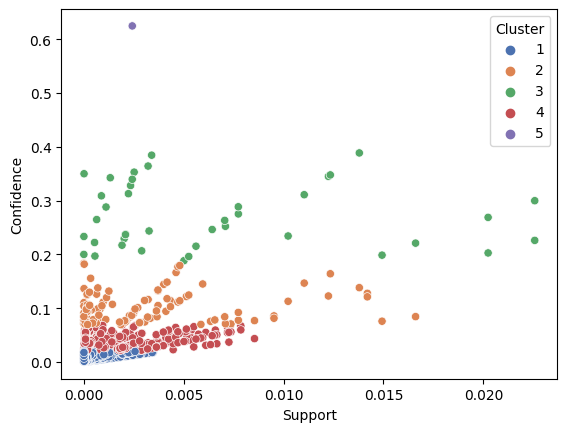

In [3]:
sns.scatterplot(data=df, x='Support', y='Confidence', hue='Cluster', palette='deep')